In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# I splitted the data to 5 million rows for users and games and 2000 rows of reocmmendations


In [21]:

recommendations_df = pd.read_csv('data/downsized/recommendations.csv')
games_df = pd.read_csv('data/downsized/games.csv')
users_df = pd.read_csv('data/downsized/users.csv')

Text(0, 0.5, 'Reviews')

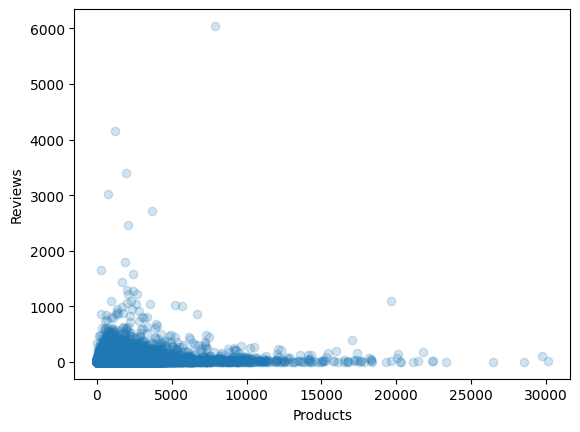

In [28]:
# plot x as user products and y as reviews scatterplot

plt.scatter(users_df['products'], users_df['reviews'], alpha=0.2)
plt.xlabel('Products')
plt.ylabel('Reviews')   

In [29]:

# Calculating correlation and p-value
correlation, p_value = pearsonr(users_df['products'], users_df['reviews'])
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.2706182202793897
P-value: 0.0


196424 2176516
Pearson Correlation Coefficient: 0.21544123735008985
P-value: 0.0


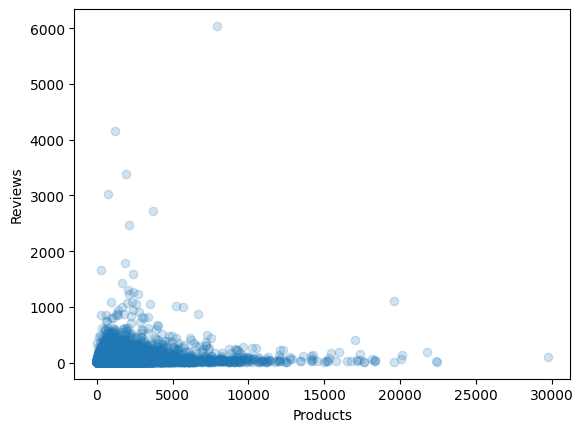

In [35]:
# How about from the standpoint of view from whereas users have at least 10 reviews?
reviewers_df = users_df[users_df['reviews'] > 10]
print(len(reviewers_df), len(users_df))
plt.scatter(reviewers_df['products'], reviewers_df['reviews'], alpha=0.2)
plt.xlabel('Products')
plt.ylabel('Reviews')


correlation, p_value = pearsonr(reviewers_df['products'], reviewers_df['reviews'])
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

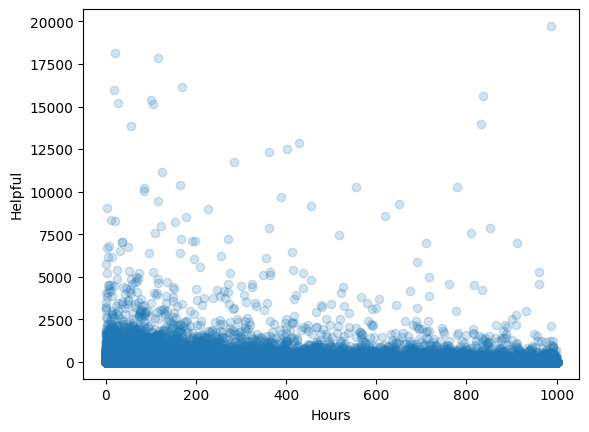

In [36]:
# - Does players with more hours played provide more helpful reviews? What is the relation between hours played and the review result?

plt.scatter(recommendations_df['hours'], recommendations_df['helpful'], alpha=0.2)
plt.xlabel('Hours')
plt.ylabel('Helpful')
plt.show()


In [38]:

# Calculating correlation and p-value
correlation, p_value = pearsonr(recommendations_df['hours'], recommendations_df['helpful'])
print('Correlation', correlation)
print("P-value: {:.4f}".format(p_value))

Correlation 0.007193694720238997
P-value: 0.0000


In [40]:
# - Find if there is an relation with the users total hours played and:
    #  - Count of games owned
    #  - Count of reviews posted

# For this, we have to sum the hours played for each user
users_total_hours = recommendations_df.groupby('user_id')['hours'].sum()
users_total_hours = users_total_hours.reset_index()
users_total_hours.columns = ['user_id', 'total_hours']
users_total_hours.head()


,user_id,total_hours
0,10,107.0
1,13,836.3
2,17,74.3
3,28,195.9
4,34,355.9


In [41]:
# merge user_total_hours with user df.
users_total_hours_enriched = pd.merge(users_total_hours, users_df, on='user_id')
users_total_hours_enriched.head()

,user_id,total_hours,products,reviews
0,10,107.0,387,2
1,13,836.3,103,5
2,17,74.3,42,3
3,28,195.9,9,1
4,34,355.9,63,1


Correlation 0.06375617656351983
P-value: 0.0000
Correlation 0.1356490777672246
P-value: 0.0000


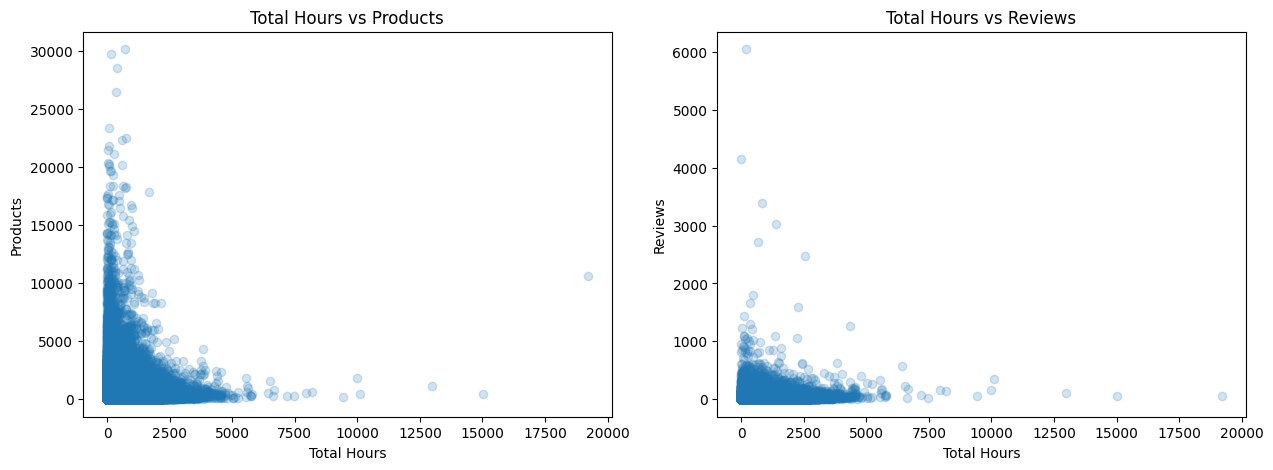

In [44]:
# separate matplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the relation between total hours and count of games owned
ax1.scatter(users_total_hours_enriched['total_hours'], users_total_hours_enriched['products'], alpha=0.2)
ax1.set_xlabel('Total Hours')
ax1.set_ylabel('Products')
ax1.set_title('Total Hours vs Products')

# Calculating correlation and p-value
correlation, p_value = pearsonr(users_total_hours_enriched['total_hours'], users_total_hours_enriched['products'])
print('Correlation', correlation)
print("P-value: {:.4f}".format(p_value))

# Plotting the relation between total hours and count of reviews posted
ax2.scatter(users_total_hours_enriched['total_hours'], users_total_hours_enriched['reviews'], alpha=0.2)
ax2.set_xlabel('Total Hours')
ax2.set_ylabel('Reviews')
ax2.set_title('Total Hours vs Reviews')

correlation, p_value = pearsonr(users_total_hours_enriched['total_hours'], users_total_hours_enriched['reviews'])
print('Correlation', correlation)
print("P-value: {:.4f}".format(p_value))

plt.show()
